In [0]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt
# Importing Sklearn Packages
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


In [2]:
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')



Automatically created module for IPython interactive environment


In [3]:
# Loading and Downloading data from sklearn 
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Storing images arrays shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

2019-06-15 14:15:28,915 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2019-06-15 14:15:29,920 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2019-06-15 14:15:30,879 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2019-06-15 14:15:32,021 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


In [0]:
X = lfw_people.data
n_features = X.shape[1]

In [5]:

# the label to predict is the id of the person
y = lfw_people.target
# Loading the target names (Label names)
target_names = lfw_people.target_names
# Checkinq How many classes are present
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Compute PCA

In [7]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 150 eigenfaces from 966 faces
done in 0.301s


In [8]:

t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

done in 0.038s


In [9]:
X_train.shape, X_train_pca.shape, X_test.shape, X_test_pca.shape

((966, 1850), (966, 150), (322, 1850), (322, 150))

Training MLP classifier

In [0]:
t0 = time()
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [20]:
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))

done in 16.770s


In [21]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
from sklearn.metrics import accuracy_score
print("done in %0.3fs" % (time() - t0))
print("accuracy is", accuracy_score(y_test,y_pred,normalize=True))
print("classification report")
print(classification_report(y_test, y_pred, target_names=target_names))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.013s
accuracy is 0.7639751552795031
classification report
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.58      0.65        19
     Colin Powell       0.89      0.74      0.81        68
  Donald Rumsfeld       0.64      0.66      0.65        32
    George W Bush       0.79      0.90      0.84       120
Gerhard Schroeder       0.65      0.63      0.64        27
      Hugo Chavez       0.64      0.60      0.62        15
       Tony Blair       0.71      0.73      0.72        41

         accuracy                           0.76       322
        macro avg       0.72      0.69      0.70       322
     weighted avg       0.77      0.76      0.76       322

confusion matrix
[[ 11   1   1   4   2   0   0]
 [  0  50   1  10   3   0   4]
 [  0   3  21   3   4   0   1]
 [  2   1   7 108   0   2   0]
 [  1   0   1   3  17   1   4]
 [  1   0   0   2   0   9   3]
 [  0   1   2   6   0   2  30]]


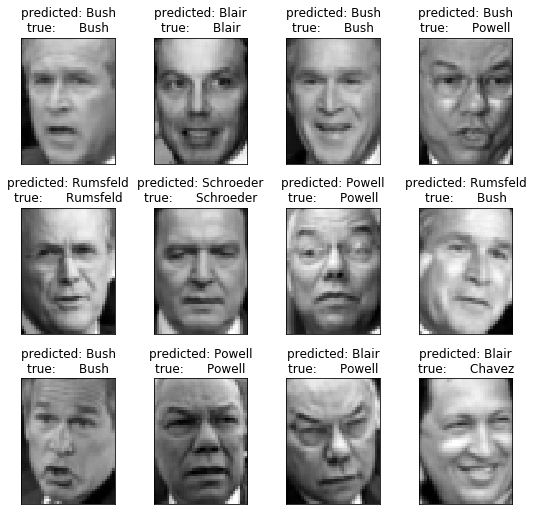

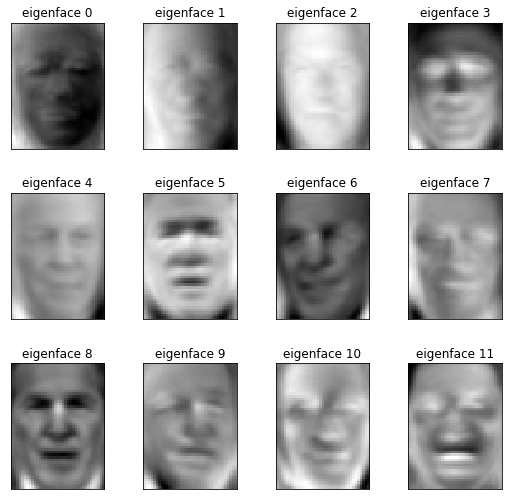

In [22]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)